Mobile Data Usage and User Behvaiour

For the project i will be using the CRSP-DM Process to be able to analyse this Data set. This data set is looking at mobile data usage and and user behavior. Below is the CRSP-DM Process:

1 BUSINESS UNDERSTANDING (understanding the problem and questions to be tackled)

2 DATA UNDERSTANDING (moving the questions to data)

3 DATA PREPARATION (Wrangling and cleaning the data)

4 Evaluation


Section 1 - Business Understanding 

I want to understand more around screen time and if there are certain indicators around it

I want to undestand the following; 

Question 1 - Is screen time higher amongst the younger generations?

Question 2 - Is there a relationship between your gender or the device you use and screen time?

Question 3 - What can help indicate screen time?

Section 2 - Data Understanding 

I will be analysising the data, to understand the size, what the data is showing, any weeknesses in the data etc. 

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./user_behavior_dataset.csv') #this is the data set that i will be using 
df.head() #this is to show some rows of the data

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [212]:
#This is code i learnt from the Data science nano degree
#I am using this to understand the size of the data
df.shape 

(700, 11)

In [213]:
#I can see the size of the data, 700 rows and 11 columns. 
# This is a reasonable size dataset to make an analysis (although it is not a large dataset)

In [214]:
#using this code is able to explain to give real insight on the whole data set
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [215]:
#Max screen time (hours/day) is 12. The age ranges from 18 to 59.
#Knowing the age ranges will be useful for me when creating age groups.

In [216]:
#This was used in the data nano degree course as a way to understand the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [217]:
#Having a look at the data, i can see the the types look reasonable, which means for now there is no need to make any changes to the type.

Section 3 - Prepare Data

In [218]:
df.isnull()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
695,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,False


In [219]:
df.isnull().sum() #there are no missing values in this data set

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

Section 4 - Evaluation

Question 1 - Is screen time higher amongst the younger generations?

C:\Users\cmezu\AppData\Local\Temp\ipykernel_27768\1364485450.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  screen_time_by_age_group = df.groupby("Age Group")["Screen On Time (hours/day)"].mean()


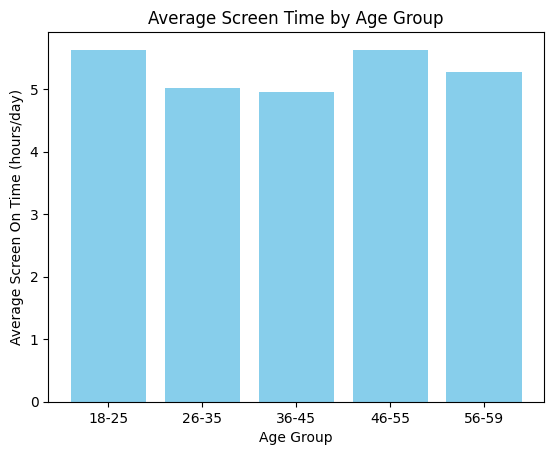

In [220]:
#adding age groups
age_bins = [18, 25, 35, 45, 55, 60] #The youngest age is 18 and the oldest age is 59
age_labels = ["18-25", "26-35", "36-45", "46-55", "56-59"]  # Define labels for the bins

df["Age Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False) #create age groups

#show screentime by age group
screen_time_by_age_group = df.groupby("Age Group")["Screen On Time (hours/day)"].mean()

# Plotting the bar chart 
plt.bar(screen_time_by_age_group.index, screen_time_by_age_group, color="skyblue") 
plt.title("Average Screen Time by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Screen On Time (hours/day)")

plt.show()

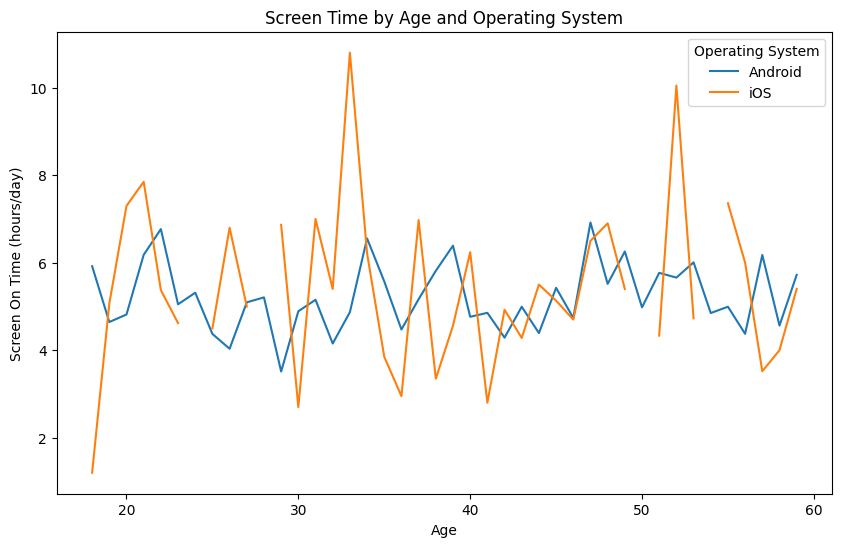

In [221]:
# Group by Operating System and Age, calculate the average screen time
grouped_data = df.groupby(["Operating System", "Age"])["Screen On Time (hours/day)"].mean().unstack(level=0)

# Plot the line graph
grouped_data.plot(kind='line', figsize=(10, 6))

# Add title and labels
plt.title("Screen Time by Age and Operating System")
plt.xlabel("Age")
plt.ylabel("Screen On Time (hours/day)")
plt.legend(title="Operating System")  

plt.show()

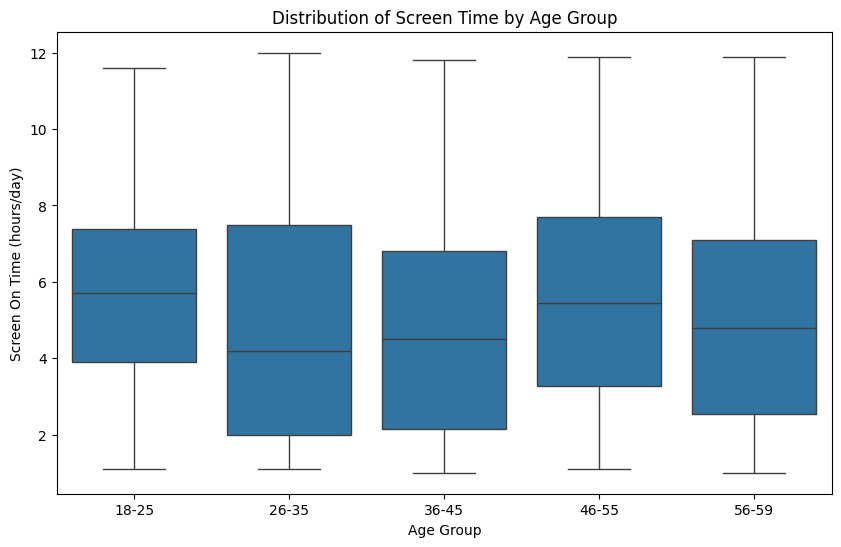

In [222]:
plt.figure(figsize=(10, 6)) #to define the size
sns.boxplot(data=df, x="Age Group", y="Screen On Time (hours/day)") #using seaborn for boxplot as this gave more accuracy in the visual compared to pandas
plt.title("Distribution of Screen Time by Age Group") #adding a title
plt.show() #show the box plot

In [223]:
age_group_counts = df['Age Group'].value_counts().sort_index() 
print(age_group_counts) #to see the count for each age group

Age Group
18-25    110
26-35    182
36-45    162
46-55    164
56-59     82
Name: count, dtype: int64


In [224]:
#There age group with the highsest screen time is 46-55
#in second is 18-25, followed by 56-59 
#so from this data, the younger age groups is not more likely to have higher screen timme 

Question 2 - Is there a relationship between your gender or the device you use and screen time?

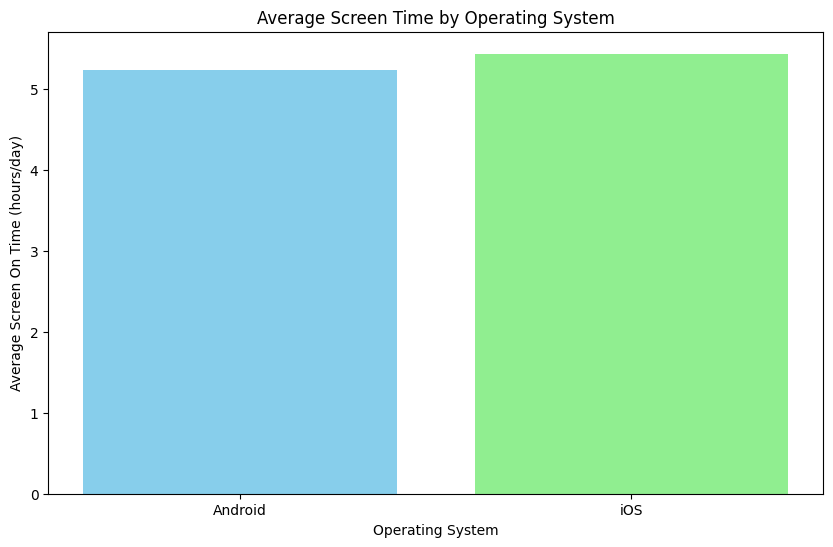

In [225]:
# Group by operating system and calculate the average screen time
screen_time_by_os = df.groupby("Operating System")["Screen On Time (hours/day)"].mean()

plt.figure(figsize=(10, 6)) #keeping it consistant at 10,6
plt.bar(screen_time_by_os.index, screen_time_by_os, color=["skyblue", "lightgreen"])
plt.title("Average Screen Time by Operating System")
plt.xlabel("Operating System")
plt.ylabel("Average Screen On Time (hours/day)")


plt.show()

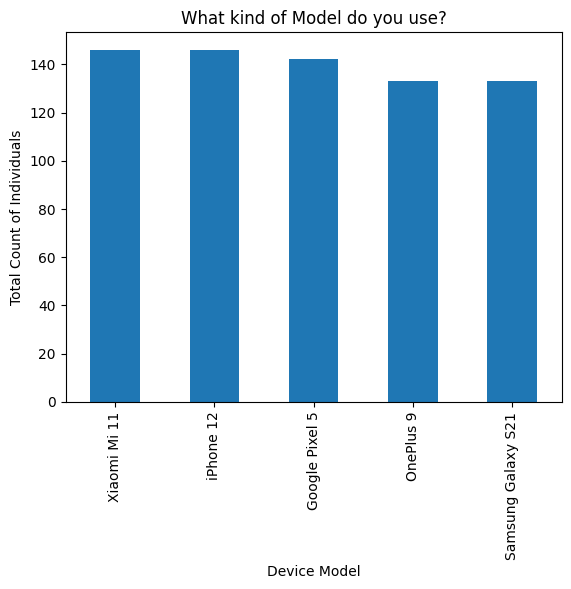

In [226]:
# count how many people are using each device model
device_count = df["Device Model"].value_counts() 

# bar graph to visual the count
device_count.plot(kind="bar")
plt.title("What kind of Model do you use?")
plt.xlabel("Device Model")
plt.ylabel("Total Count of Individuals")
plt.show()

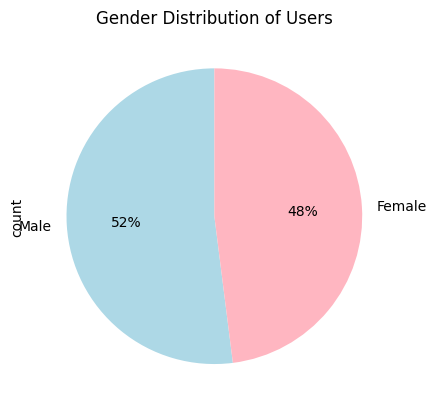

In [227]:
gender_counts = df["Gender"].value_counts() #count users gender

#plot pie chart and rotate and colour to help look visually better
gender_counts.plot(kind="pie", colors=["lightblue", "lightpink"], autopct='%1.0f%%', startangle=90) 
plt.title("Gender Distribution of Users") #add title
plt.show()

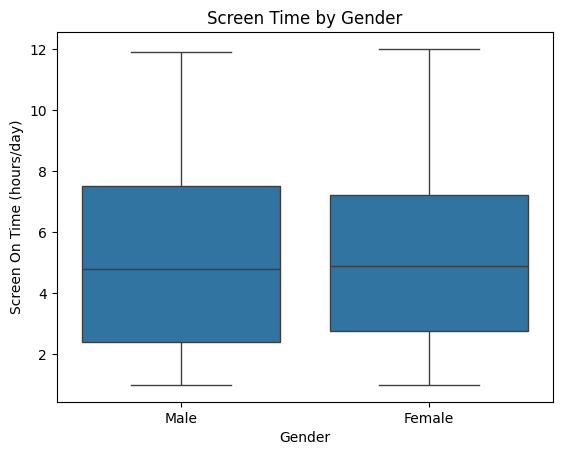

In [228]:
sns.boxplot(data=df, x="Gender", y="Screen On Time (hours/day)") # creating a boxplot by gender and screen time
plt.title("Screen Time by Gender") #add title
plt.show()

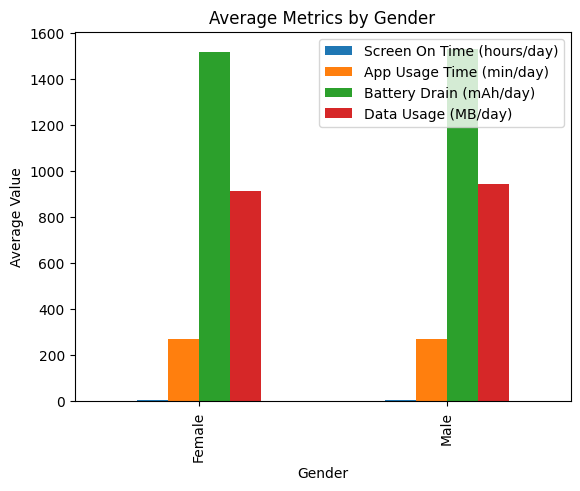

In [229]:
#creating the bar chart to see the metrics to be able to compare for gender
df.groupby("Gender")[["Screen On Time (hours/day)", "App Usage Time (min/day)", "Battery Drain (mAh/day)", "Data Usage (MB/day)"]].mean().plot(kind="bar")
plt.title("Average Metrics by Gender") # adding title
plt.ylabel("Average Value") #adding y lable 
plt.show()

In [230]:
#Operating system 
#screentime is higher for IOS, although it is also shown that some of the users with higher screen time use IOS

#Gender
#there is no idication that gender has an impact on screentime

Question 3 - What can help indicate screen time?

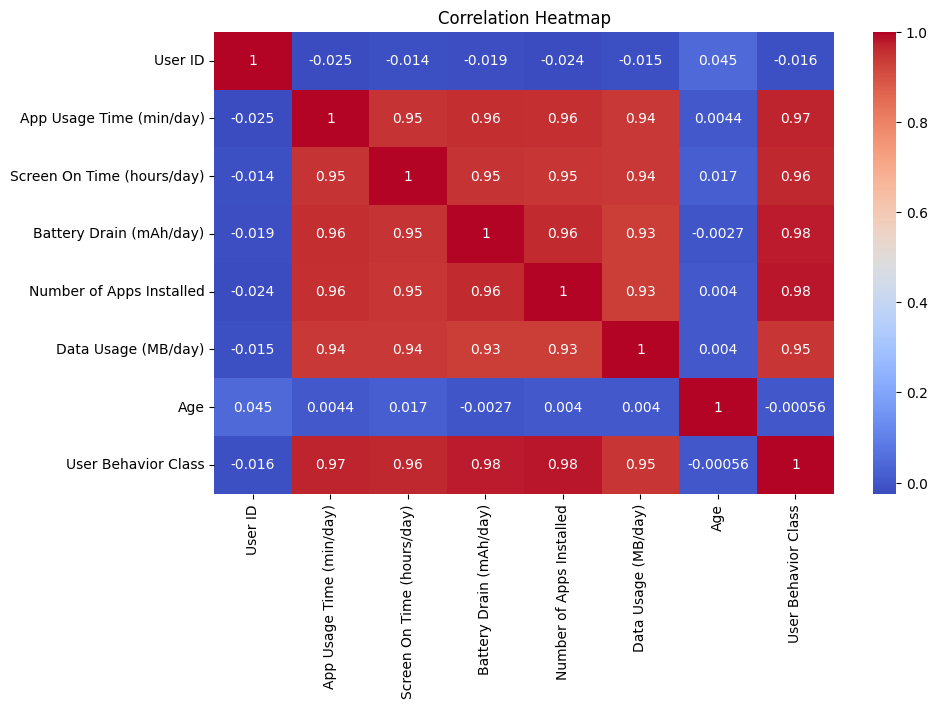

In [231]:
#creating a heatmap just to see for all numerical values first, to see if there is a relationship there 

numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",) #added colour and annotation
plt.title("Correlation Heatmap") #adding the title
plt.show()

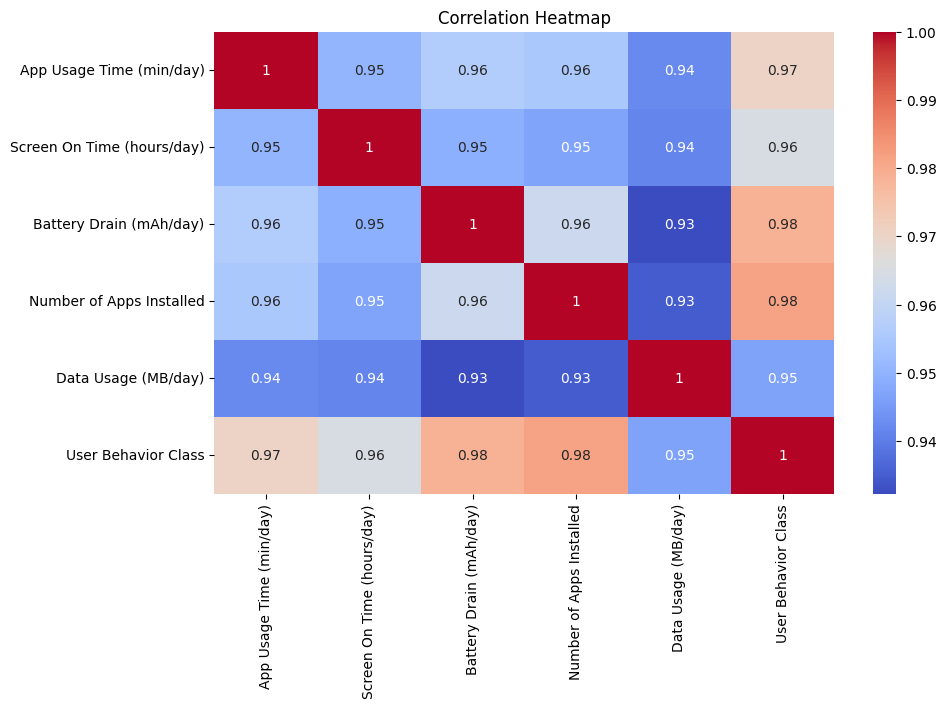

In [232]:
#same heatmap but without age and user id
numeric_df = df.select_dtypes(include=['number']).drop(columns=["Age", "User ID"])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",) #adding data labels and colour
plt.title("Correlation Heatmap") #adding title
plt.show()

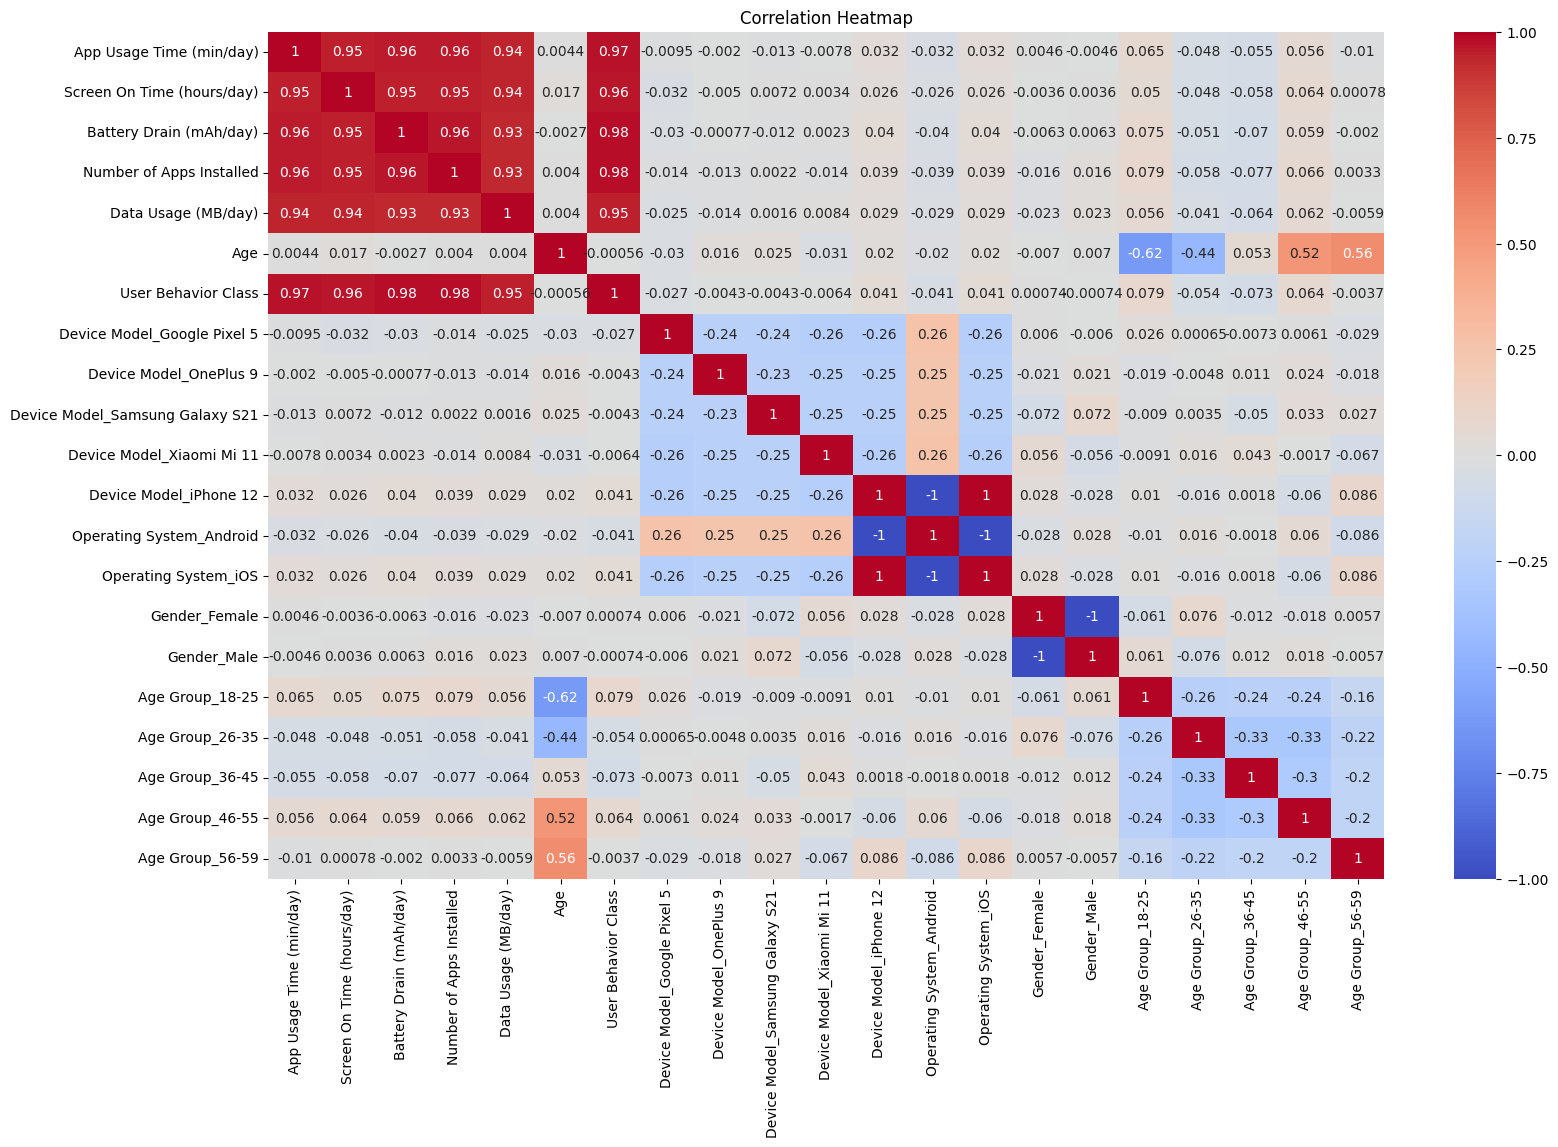

In [233]:
categorical_columns = pd.get_dummies(df.drop(columns=["User ID"]), drop_first=False)


# Calculate the correlation matrix
correlation_matrix = categorical_columns.corr()

plt.figure(figsize=(18, 11)) #needed more space to fit all values

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",) #adding labels and colour
plt.title("Correlation Heatmap") #adding title 
plt.show()

In [234]:
#App usage time, screen on time, battery drain, number of apps installed, data usage and user behaviour class,
#all seem to have a stong positive correlation -
#  as one increase the other tends to increase as well
#this doesn't seem suprising 
#there looks to be no relationship between user id and age when looking at user behaviour
#age is suprising due to wider reasearch was thinking there may be a relationship there 